# **ML Assignment 1**

# Data Exploration, Pre-processing, Wrangling and Linear Regression  

Atharva Chikhale         2021A7PS2752H

Chinni Vamshi Krushna    2021A7PS2084H

Rishabh Mittal           2021A7PS2620H

Number of rows: 117

DataFrame contents:

     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]
statistics of the data
              YEAR  Rainfall in June
count   117.000000        113.000000
mean   1958.606838         72.957522
std      33.389023         35.968989
min    1901.000000         17.700000
25%    1930.000000         48.500000
50%    1959.000000         69.900000
75%    1987.000000         90.600000
max    2015.000000        161.000000


Mean values:
YEAR                1958.606838
Rainfall in June      72.957522
Name: mean, dtype: float64

Median values:
YEAR                1959.0
Rainfall in June      69.9
Name: 50%, dtype: float64

Standard deviation values:
YEAR        

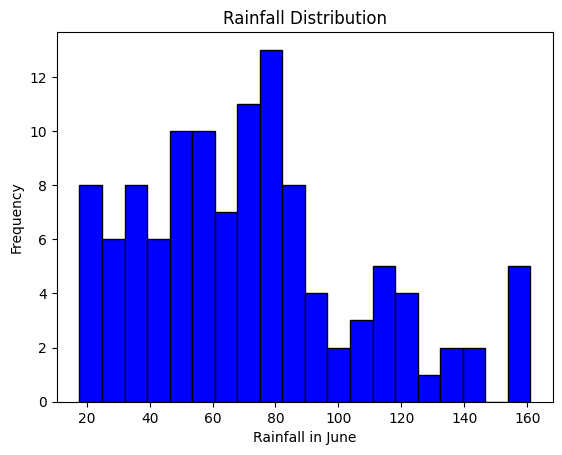


Mean: 72.21652173913043
Median: 69.9
The distribution is skewed to the right.

Range before scaling: 143.3
Difference in range after Standard Scaling: 3.4341088288340345
Difference in range after Min-Max Scaling: 1.0


Applying Linear Regression on standard scaled data :



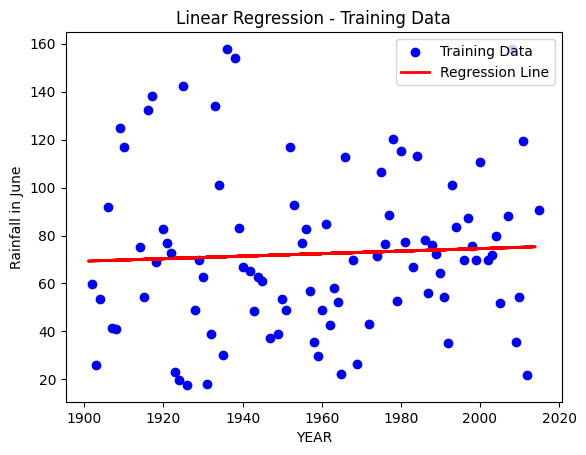


Results for 80.0 : 20.0 split of the data
Mean Squared Error (MSE) of the test data       :        1565.2372526417516
Mean Absolute Error (MAE) of the test data      :        32.104436059010254
Root Mean Squared Error (RMSE) of the test data :        39.56307941303042



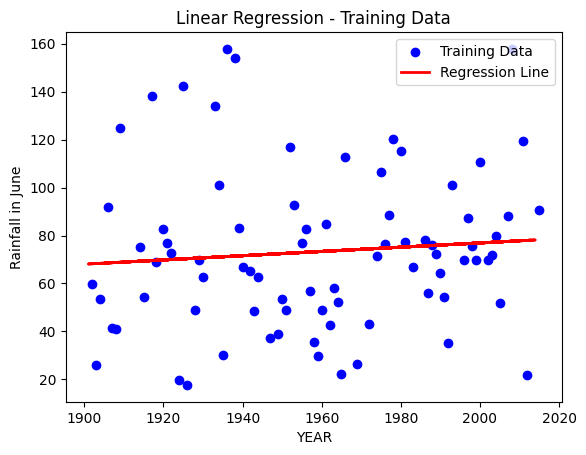


Results for 70.0 : 30.0 split of the data
Mean Squared Error (MSE) of the test data       :        1485.2961896439076
Mean Absolute Error (MAE) of the test data      :        32.20619655694001
Root Mean Squared Error (RMSE) of the test data :        38.539540599803566


Now applying Linear Regression on minmax scaled data :



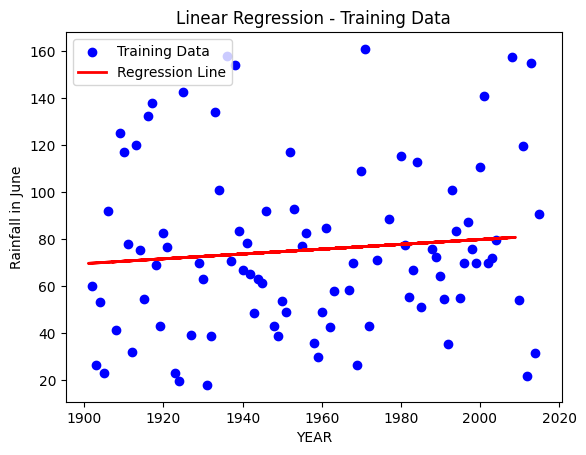


Results for 80.0 : 20.0 split of the data
Mean Squared Error (MSE) of the test data       :        1012.5496485223331
Mean Absolute Error (MAE) of the test data      :        26.74671260696578
Root Mean Squared Error (RMSE) of the test data :        31.820585295093696



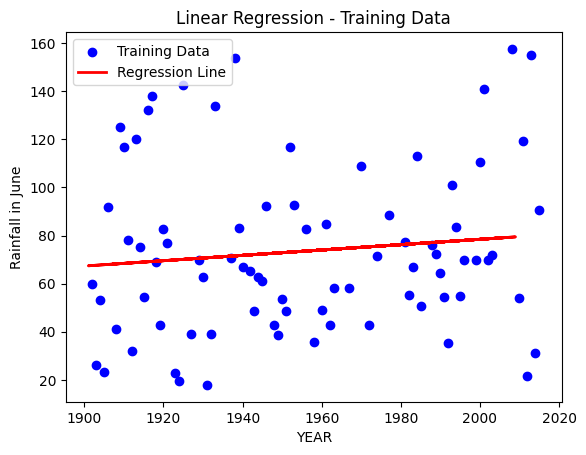


Results for 70.0 : 30.0 split of the data
Mean Squared Error (MSE) of the test data       :        1249.0786219644306
Mean Absolute Error (MAE) of the test data      :        27.465290129456097
Root Mean Squared Error (RMSE) of the test data :        35.34230640414446



In [7]:

# Step 1: Import Pandas and Read Data
import pandas as pd

# Define the column names for the DataFrame
header_names = ['YEAR', 'Rainfall in June']

# Read data from the CSV file into a Pandas DataFrame
data = pd.read_csv('data.csv', usecols=header_names)

# Display the number of rows and contents of the DataFrame
print(f"Number of rows: {len(data)}")
print("\nDataFrame contents:\n")
print(data)

# Step 2: Generate Descriptive Statistics
# Descriptive statistics using describe method
stats = data.describe()
print("statistics of the data")
print(stats)

print("\n")
mean_values = stats.loc['mean']
median_values = stats.loc['50%']
std_dev_values = stats.loc['std']

# Display the results
print("Mean values:")
print(mean_values)

print("\nMedian values:")
print(median_values)

print("\nStandard deviation values:")
print(std_dev_values)

# Step 3: Impute Missing Values with Median
# Calculate the median of the 'Rainfall in June' column
median_value = data['Rainfall in June'].median()

# Impute missing values with the calculated median
data['Rainfall in June'].fillna(median_value, inplace=True)

# Step 4: Remove Duplicates
# Remove duplicate rows from the DataFrame
data.drop_duplicates(inplace=True)

# Display the latest DataFrame
print("DataFrame after imputing missing values and removing duplicate rows:")
print(data)
# r = len(data)
# print(r)

# Step 5: Create Histogram Plot
import matplotlib.pyplot as plt

# Create a histogram plot of the 'Rainfall in June' column
plt.hist(data['Rainfall in June'], bins=20, color='blue', edgecolor='black')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall in June')
plt.ylabel('Frequency')
plt.show()


# Compare Mean and Median
mean_value = data['Rainfall in June'].mean()
median_value = data['Rainfall in June'].median()

print(f"\nMean: {mean_value}")
print(f"Median: {median_value}")

# Determine skewness based on Mean and Median
if mean_value > median_value:
    print("The distribution is skewed to the right.")
elif mean_value < median_value:
    print("The distribution is skewed to the left.")
else:
    print("The distribution is symmetric.")


# Step 6: Standard Scaling and Min-Max Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data[['YEAR']])

# Min-Max scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data[['YEAR']])


print("")
print(f"Range before scaling: {data['Rainfall in June'].max() - data['Rainfall in June'].min()}")


# Report differences in range

print(f"Difference in range after Standard Scaling: {data_standard_scaled.max() - data_standard_scaled.min()}")
print(f"Difference in range after Min-Max Scaling: {data_minmax_scaled.max() - data_minmax_scaled.min()}")
print("")

print("\nApplying Linear Regression on standard scaled data :\n")
# Step 7: Build Linear Regression Model (80-20 Split)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def linearReg_with_standard_scaling(testSizeRatio):
    x_train, x_test, y_train, y_test = train_test_split(data_standard_scaled, data['Rainfall in June'], test_size=testSizeRatio, random_state=42)

    # Create and fit a Linear Regression model
    model = LinearRegression().fit(x_train, y_train)

    # Inverse transform the scaled 'YEAR' values
    x_train_original = scaler_standard.inverse_transform(x_train)
    x_test_original = scaler_standard.inverse_transform(x_test)

    # Plotting the Regression line on the training data
    plt.scatter(x_train_original, y_train, color='blue', label='Training Data')  # Using unscaled 'YEAR' values
    plt.plot(x_test_original, model.predict(x_test), color='red', linewidth=2, label='Regression Line')  # Inverse transforming predicted values
    plt.title('Linear Regression - Training Data')
    plt.xlabel('YEAR')
    plt.ylabel('Rainfall in June')
    plt.legend()
    plt.show()

    # Evaluation metrics
    y_pred = model.predict(x_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    print("")
    print(f"Results for {(1-testSizeRatio)*100} : {testSizeRatio*100} split of the data")
    print(f"Mean Squared Error (MSE) of the test data       :        {mse}")
    print(f"Mean Absolute Error (MAE) of the test data      :        {mae}")
    print(f"Root Mean Squared Error (RMSE) of the test data :        {rmse}")
    print("")

linearReg_with_standard_scaling(0.2)
linearReg_with_standard_scaling(0.3)

print("\nNow applying Linear Regression on minmax scaled data :\n")

def linearReg_with_minmax_scaling(testSizeRatio):
    x_train, x_test, y_train, y_test = train_test_split(data_minmax_scaled, data['Rainfall in June'], test_size=testSizeRatio, random_state=25)

    # Create and fit a Linear Regression model
    model = LinearRegression().fit(x_train, y_train)

    # Inverse transform the scaled 'YEAR' values
    x_train_original = scaler_minmax.inverse_transform(x_train)
    x_test_original = scaler_minmax.inverse_transform(x_test)

    # Plotting the Regression line on the training data
    plt.scatter(x_train_original, y_train, color='blue', label='Training Data')  # Using unscaled 'YEAR' values
    plt.plot(x_test_original, model.predict(x_test), color='red', linewidth=2, label='Regression Line')  # Inverse transforming predicted values
    plt.title('Linear Regression - Training Data')
    plt.xlabel('YEAR')
    plt.ylabel('Rainfall in June')
    plt.legend()
    plt.show()

    # Evaluation metrics
    y_pred = model.predict(x_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    print("")
    print(f"Results for {(1-testSizeRatio)*100} : {testSizeRatio*100} split of the data")
    print(f"Mean Squared Error (MSE) of the test data       :        {mse}")
    print(f"Mean Absolute Error (MAE) of the test data      :        {mae}")
    print(f"Root Mean Squared Error (RMSE) of the test data :        {rmse}")
    print("")

linearReg_with_minmax_scaling(0.2)
linearReg_with_minmax_scaling(0.3)
